In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import IPython
from scipy.io import wavfile

## Non iterative approach

We compute the optimal adaptive filter by naively solving the normal equations. This is far from optimal because it is a slow method and it is not adaptive.

In [2]:
fs_d, d = wavfile.read('data/2_RecStatic.wav')  # read d[n]
d_normalized = d / np.max(d)

_, x = wavfile.read('data/2_Sig.wav')  # read x[n]
x_normalized = x / np.max(x)

In [3]:
IPython.display.Audio(d, rate=fs_d)

In [4]:
IPython.display.Audio(x, rate=fs_d)

In [69]:
K = 800  # Number of taps

# Compute correlations
Rx = np.zeros(K)
rdx = np.zeros(K)

for i in range(K):
    # Rx[i] = np.mean(x[:-K] * x[i:i+len(x)-K])
    Rx[i] = np.mean(x_normalized[:(len(x)-K)] * x_normalized[i:(len(x) + i - K)])
    rdx[i] = np.mean(x_normalized[:(len(x)-K)] * d_normalized[i:(len(x) + i - K)])

# can also use sp.correlate

R = sp.linalg.toeplitz(Rx)

In [82]:
# Compute adaptive filter
f = np.linalg.solve(R, rdx)
f_norm = f/f[0]

In [83]:
e = d - np.convolve(f_norm, x, mode='same')
e_normalized = e/np.max(e)

In [84]:
IPython.display.Audio(d, rate=fs_d)

In [85]:
IPython.display.Audio(e, rate=fs_d)

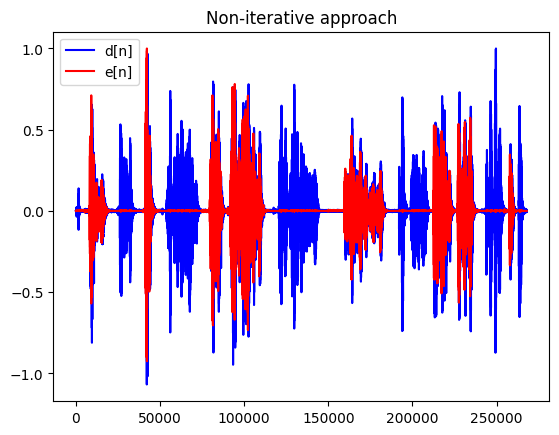

In [86]:
plt.title('Non-iterative approach')
plt.plot(d_normalized, color='blue', label='d[n]')
plt.plot(e_normalized, color='red', label='e[n]')
plt.legend()

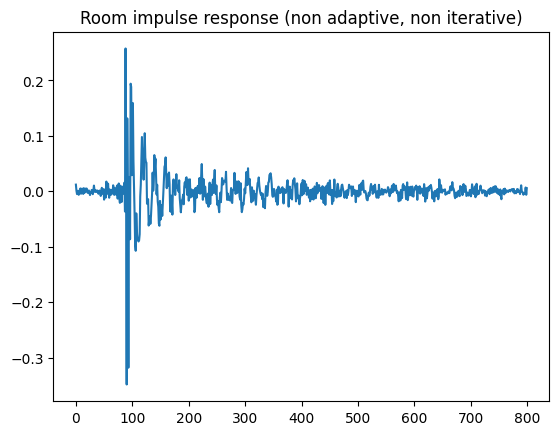

In [81]:
plt.title('Room impulse response (non adaptive, non iterative)')
plt.plot(f)

## Least Mean Squares (LMS)

This method uses the LMS algorithm, which iteratively computes $\bold{f}_{n+1} = \bold{f}_n + \mu \bold{x}_n e_n$, where $e_n = d_n - y_n$. It is much faster than the previous naive method and can be used to compute $\bold{f}_n$ on the fly.

In [28]:
# Compute lambda max, choose 0 < mu < 2/lambdaMax

In [30]:
# Apply the iteration (cf other notebooks)